## In this notebook we train random forest classifiers and discover 2 features that should not be used for predictions: 'is_ip_blacklisted' and 'is_email_blacklisted'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('Clean.csv')

In [3]:
data.head()
data = data.drop(['Unnamed: 0','currency','ship_class'],axis=1)

In [4]:
#data.iloc[:,:99].info(verbose=True)

In [5]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)

In [6]:
from sklearn.model_selection import train_test_split
X = data.drop('is_fraud',axis=1)
y = data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [7]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
rfc_pred = rfc.predict(X_test)

In [9]:
from sklearn.metrics import classification_report,confusion_matrix

In [10]:
print(confusion_matrix(y_test,rfc_pred))

[[18981     2]
 [    0  1017]]


In [11]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18983
           1       1.00      1.00      1.00      1017

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



In [12]:
rfc.feature_importances_

array([4.95821706e-03, 1.13935647e-03, 5.21611858e-04, 0.00000000e+00,
       4.51056000e-04, 3.61939355e-03, 2.75881032e-03, 2.20316151e-02,
       2.72261725e-01, 4.35033297e-01, 5.89064631e-03, 4.13763700e-02,
       1.83136044e-02, 2.73922738e-04, 1.72555641e-05, 1.16303085e-04,
       1.48618541e-02, 1.78299231e-02, 1.10090132e-03, 3.21835454e-04,
       6.26655347e-04, 6.27662931e-04, 3.01291538e-04, 3.69612403e-03,
       1.10639422e-03, 3.02136796e-03, 1.82601378e-03, 3.27953230e-03,
       1.37051537e-03, 3.55773962e-04, 4.43800186e-03, 5.32408545e-03,
       4.14757126e-03, 2.60355945e-03, 1.88018453e-03, 2.36556047e-03,
       6.23284318e-03, 1.43864531e-04, 0.00000000e+00, 6.87755276e-05,
       5.72874161e-03, 1.56241035e-03, 1.23831896e-02, 4.06105282e-03,
       1.67697487e-03, 4.81256436e-03, 2.48882229e-03, 5.13643151e-03,
       5.83781434e-03, 3.82536276e-03, 5.16150114e-03, 5.82706290e-03,
       3.85258988e-03, 8.22704335e-03, 8.51073198e-04, 1.43939626e-03,
      

### Having obtained  feature_importances_  we now idenitify the 2 features which are not to be used for predictions:

In [33]:
X.columns[rfc.feature_importances_ > 0.1]

Index(['is_ip_blacklisted', 'is_email_blacklisted'], dtype='object')

# Decision tree

In [175]:
X_train['age_of_account'].head()

49049    158359293.0
32187    116586212.0
55771    121407395.0
6938     112778386.0
15012     92386607.0
Name: age_of_account, dtype: float64

In [176]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train['age_of_account'].reshape(-1, 1), y_train)

/Users/cristiangavrus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [177]:
predictions = dtree.predict(X_test['age_of_account'].reshape(-1, 1))
print(confusion_matrix(y_test,predictions))

[[18966    35]
 [   53   946]]


/Users/cristiangavrus/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [178]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     19001
          1       0.96      0.95      0.96       999

avg / total       1.00      1.00      1.00     20000



In [77]:
y_test.value_counts()

0    18979
1     1021
Name: is_fraud, dtype: int64

# Random forest with first 10 features

In [170]:
X.iloc[:,0:8].head()

,age_of_account,percent_of_billing_name_in_email,percent_of_shipping_names_in_email,is_disposable_email,is_real_email,email_username_length,item_count,order_total
0,113438015.0,0,0.0,0,1,8.0,4,1789.85
1,70225782.0,0,0.0,0,1,10.0,1,150.00
2,61712171.0,0,0.0,0,1,9.0,1,878.49
3,210555308.0,0,0.0,0,1,10.0,1,277.25
4,78225420.0,0,0.0,0,1,10.0,1,896.62


In [171]:
# X.iloc[:,0:10]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X.iloc[:,0:8], y, test_size=0.20)

In [172]:
rfc2 = RandomForestClassifier(n_estimators=100)
rfc2.fit(X_train2, y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [173]:
rfc_pred2 = rfc2.predict(X_test2)
print(confusion_matrix(y_test2,rfc_pred2))

[[18979     0]
 [    0  1021]]


In [174]:
rfc2.feature_importances_

array([3.58543553e-01, 1.46508586e-02, 1.08440165e-02, 2.81245637e-05,
       1.23767158e-02, 1.17163487e-01, 6.76462652e-02, 4.18746979e-01])

# With dropped data

In [157]:
data2 = data.drop(['is_ip_blacklisted', 'is_email_blacklisted'],axis=1)

In [158]:
X3 = data2.drop('is_fraud',axis=1)
y3 = data2['is_fraud']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20)

In [159]:
rfc3 = RandomForestClassifier(n_estimators=100)
rfc3.fit(X_train3, y_train3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [160]:
rfc_pred3 = rfc3.predict(X_test3)
print(confusion_matrix(y_test3,rfc_pred3))

[[18957     0]
 [    0  1043]]


In [161]:
rfc3.feature_importances_

array([2.81996101e-02, 6.23922193e-03, 3.75241646e-03, 0.00000000e+00,
       2.36238231e-03, 1.72612572e-02, 1.13218412e-02, 7.09421855e-02,
       1.96458885e-02, 8.54333874e-02, 5.62704544e-02, 1.42185435e-03,
       3.90005758e-05, 6.15669578e-04, 3.03619289e-02, 3.23985728e-02,
       4.48024378e-03, 2.78397070e-03, 1.20293603e-03, 4.78898880e-03,
       1.27357507e-03, 2.10521055e-02, 8.05032781e-03, 1.91467693e-02,
       1.18559729e-02, 1.29349013e-02, 5.75570843e-03, 1.83429140e-03,
       1.74922316e-02, 2.27925731e-02, 1.67260947e-02, 1.63922458e-02,
       9.45888671e-03, 1.26792680e-02, 3.09636770e-02, 1.10627584e-03,
       0.00000000e+00, 2.01279271e-04, 3.14985360e-02, 4.65306932e-03,
       4.31706641e-02, 1.85944336e-02, 7.69424848e-03, 2.67782979e-02,
       1.27787779e-02, 2.63508147e-02, 2.06102221e-02, 1.73879864e-02,
       2.72133275e-02, 2.06196219e-02, 2.16364838e-02, 2.00125403e-02,
       1.58584314e-03, 3.43495366e-03, 3.51159669e-03, 1.07665617e-02,
      

In [111]:
X3

,age_of_account,percent_of_billing_name_in_email,percent_of_shipping_names_in_email,is_disposable_email,is_real_email,email_username_length,item_count,order_total,is_email_domain_blacklisted,product_blacklist_percent,...,avs_code_P,avs_code_R,avs_code_S,avs_code_W,avs_code_X,avs_code_Y,avs_code_Z,freight_truck,small_parcel,white_glove
0,113438015.0,0,0.0,0,1,8.0,4,1789.85,0,0.0,...,0,0,0,0,0,1,0,1,0,0
1,70225782.0,0,0.0,0,1,10.0,1,150.00,0,0.0,...,0,0,0,0,0,1,0,0,1,0
2,61712171.0,0,0.0,0,1,9.0,1,878.49,0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,210555308.0,0,0.0,0,1,10.0,1,277.25,0,1.0,...,0,0,0,0,0,1,0,0,1,0
4,78225420.0,0,0.0,0,1,10.0,1,896.62,0,0.0,...,0,0,0,0,0,0,0,0,0,1
5,74803661.0,100,0.0,0,1,7.0,1,158.02,0,1.0,...,0,0,0,0,0,1,0,0,1,0
6,83452204.0,0,0.0,0,1,10.0,2,223.94,0,0.0,...,0,0,0,0,0,1,0,0,1,0
7,84833503.0,0,0.0,0,1,11.0,4,1267.53,0,0.0,...,1,0,0,0,0,0,0,0,1,0
8,103352770.0,0,0.0,0,0,9.0,1,249.99,0,1.0,...,0,0,0,0,0,1,0,0,1,0
9,79333646.0,100,100.0,0,1,12.0,1,525.52,0,0.0,...,0,0,0,0,0,1,0,0,1,0


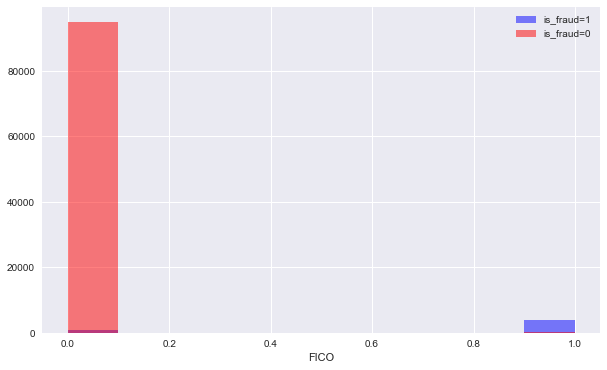

In [117]:
plt.figure(figsize=(10,6))
data[data['is_fraud']==1]['is_ip_blacklisted'].hist(alpha=0.5,color='blue',
                                              label='is_fraud=1')
data[data['is_fraud']==0]['is_ip_blacklisted'].hist(alpha=0.5,color='red',
                                              label='is_fraud=0')
plt.legend()
plt.xlabel('FICO')

In [ ]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

#X = StandardScaler().fit_transform(X)

X = X.drop(['is_ip_blacklisted','is_email_blacklisted', 'is_email_domain_blacklisted'], axis=1)

#X = X['age_of_account'].to_frame()

for train_indices, test_indices in splitter.split(X, y):
    X_train, y_train = X.iloc[train_indices], y.iloc[train_indices]
    X_test, y_test = X.iloc[test_indices], y.iloc[test_indices]
    
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    fpr, recall, th = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, recall)
    plt.title('ROC Curve')
    plt.plot(fpr,recall, 'b', label='AUC=%0.2f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.ylabel('Recall')
    plt.xlabel('False Positive')
    plt.show()
    
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
